In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.preprocessing import LabelEncoder
#LabelEncoder is used to convert categorical data to numerical data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import kagglehub
# We may use Decision Tree or XGBoost for better results
# from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization



In [6]:
path = kagglehub.dataset_download("ninzaami/loan-predication")
df = pd.read_csv(path + '/train_u6lujuX_CVtuZ9i (1).csv')
# print("Path to dataset files:", path)

In [7]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
X = df.drop(columns = ['Loan_ID', 'Loan_Status'], axis=1)
#drop the vertical slice of the dataframe excluding Loan_ID and Loan_Status
y = df['Loan_Status']
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col].astype(str))
# For every column in X, if the datatype is object (categorical), apply LabelEncoder to convert it to numerical
#  Also convert to string to avoid any issues with NaN values
y = le.fit_transform(y.astype(str))
# Convert y to numerical using LabelEncoder


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

Accuracy of XGBoost Classifier: 0.7723577235772358


c:\Users\vpthi\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:43:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


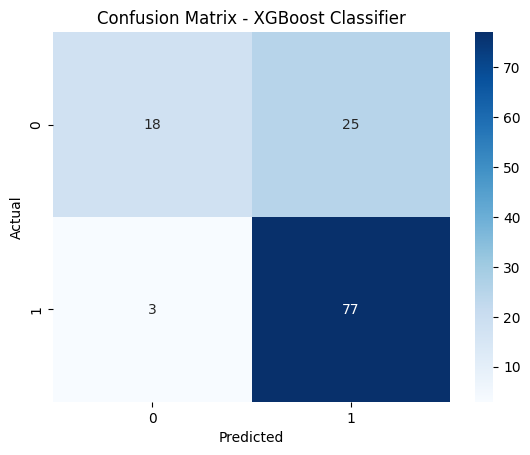

              precision    recall  f1-score   support

           0       0.86      0.42      0.56        43
           1       0.75      0.96      0.85        80

    accuracy                           0.77       123
   macro avg       0.81      0.69      0.70       123
weighted avg       0.79      0.77      0.75       123



In [ ]:
model = XGBClassifier(max_depth=6, n_estimators=200, learning_rate=0.01, use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of XGBoost Classifier:", accuracy)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost Classifier')
plt.show()
print(classification_report(y_test, y_pred))

Epoch 1/100


c:\Users\vpthi\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5638 - loss: 0.6919 - val_accuracy: 0.6970 - val_loss: 0.6787
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5969 - loss: 0.6781 - val_accuracy: 0.6970 - val_loss: 0.6660
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5893 - loss: 0.6728 - val_accuracy: 0.6970 - val_loss: 0.6565
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6582 - loss: 0.6606 - val_accuracy: 0.6970 - val_loss: 0.6486
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6811 - loss: 0.6455 - val_accuracy: 0.6970 - val_loss: 0.6420
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6658 - loss: 0.6450 - val_accuracy: 0.6970 - val_loss: 0.6368
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6658 - loss: 0.6480 - val_accuracy: 0.6970 - val_loss: 0.6307
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6760 - loss: 0.6318 - val_accuracy: 0.6970 - val_loss: 0.

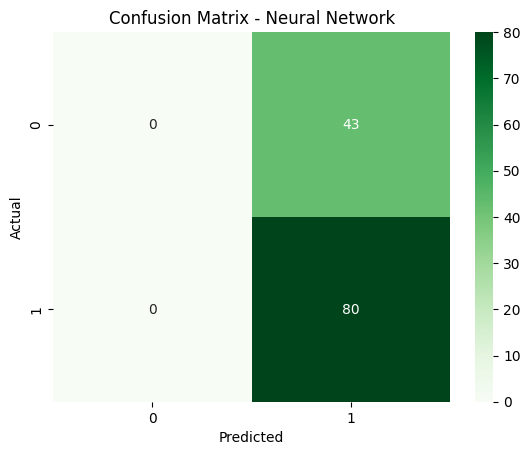

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.65      1.00      0.79        80

    accuracy                           0.65       123
   macro avg       0.33      0.50      0.39       123
weighted avg       0.42      0.65      0.51       123



c:\Users\vpthi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\vpthi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\vpthi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

In [27]:
model = Sequential(
    [
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        BatchNormalization(),
        # BatchNormalization normalizes the activations of the previous layer at each batch, i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1
        # Why Relu? It introduces non-linearity and helps in learning complex patterns
        # It also helps to mitigate the vanishing gradient problem
        # Input shape is the number of features in the dataset
        Dropout(0.5),
        #Dropout is a regularization technique to prevent overfitting by randomly setting a fraction of input units to 0 at each update during training time
        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ]
)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)
y_pred = (model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Neural Network:", accuracy)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Neural Network')
plt.show()
print(classification_report(y_test, y_pred))

Accuracy of Random Forest Classifier: 0.7804878048780488


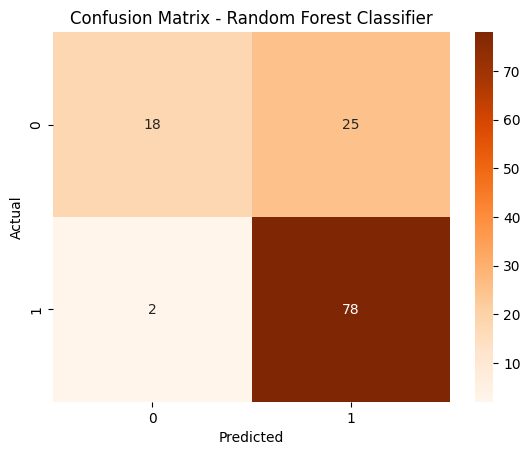

              precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123



In [28]:
model = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Random Forest Classifier:", accuracy)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()
print(classification_report(y_test, y_pred))

Accuracy of Decision Tree Classifier: 0.7317073170731707


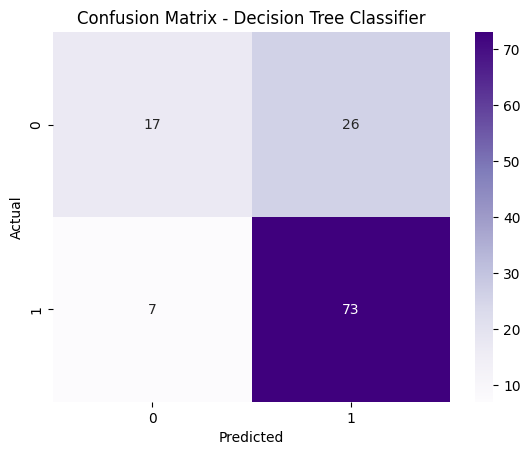

              precision    recall  f1-score   support

           0       0.71      0.40      0.51        43
           1       0.74      0.91      0.82        80

    accuracy                           0.73       123
   macro avg       0.72      0.65      0.66       123
weighted avg       0.73      0.73      0.71       123



In [32]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=6, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Decision Tree Classifier:", accuracy)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()
print(classification_report(y_test, y_pred))